# Making a contour map of global temperature

First let's import necessary modules: <br>
Cartopy is a Python package designed for geospatial data processing in order to produce maps and other geospatial data analyses. For more information on cartopy can be found here: <br>
  >  https://scitools.org.uk/cartopy/docs/latest/

In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd

Open and read a netCDF file.

In [2]:
filename='trmm_mon_1998_2015.nc'
with xr.open_dataset(filename) as ds1:      
    print(ds1)

<xarray.Dataset>
Dimensions:    (time: 12, longitude: 1440, latitude: 400)
Coordinates:
  * time       (time) datetime64[ns] 2006-07-02T12:00:00 ... 2007-06-01T17:20:00
  * longitude  (longitude) float64 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
  * latitude   (latitude) float64 -49.88 -49.62 -49.38 ... 49.38 49.62 49.88
Data variables:
    pcp        (time, latitude, longitude) float32 ...
    err        (time, latitude, longitude) float32 ...
    weight     (time, latitude, longitude) float32 ...
Attributes:
    Conventions:               CF-1.4
    calendar:                  standard
    comments:                  file created by grads using lats4d available f...
    model:                     geos/das
    center:                    gsfc
    history:                   Mon Jun  6 13:47:33 2016: ncrcat /Users/jungeu...
    nco_openmp_thread_number:  1


In [3]:
time2 = pd.date_range("1999-12-15", freq="MS", periods=12)+ pd.DateOffset(days=14)
ds1['time']=time2
filename2='trmm_mon_1998_2015_new.nc'
ds1.to_netcdf(filename2) # rewrite to netcdf
ds2=xr.open_dataset(filename2)
ds2['time']

<xarray.DataArray 'time' (time: 12)>
array(['2000-01-15T00:00:00.000000000', '2000-02-15T00:00:00.000000000',
       '2000-03-15T00:00:00.000000000', '2000-04-15T00:00:00.000000000',
       '2000-05-15T00:00:00.000000000', '2000-06-15T00:00:00.000000000',
       '2000-07-15T00:00:00.000000000', '2000-08-15T00:00:00.000000000',
       '2000-09-15T00:00:00.000000000', '2000-10-15T00:00:00.000000000',
       '2000-11-15T00:00:00.000000000', '2000-12-15T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2000-01-15 2000-02-15 ... 2000-12-15

"pcp" is a variable for precipitation. You can see that the unit is mm/hour. I'm going to change the unit to mm/day.

In [4]:
# Assign ds1.pcp to prcp
prcp=ds1.pcp*24.

Check the variable latitude and assign it as a "lat" variable.

In [5]:
lat=ds1.latitude
lat

<xarray.DataArray 'latitude' (latitude: 400)>
array([-49.875, -49.625, -49.375, ...,  49.375,  49.625,  49.875])
Coordinates:
  * latitude  (latitude) float64 -49.88 -49.62 -49.38 ... 49.38 49.62 49.88
Attributes:
    units:      degrees_north
    long_name:  Latitude

Print variables in the file.

#### Exercise
Check the variable longitude and assign it as a "lon" variable.

### Plotting January precipitation

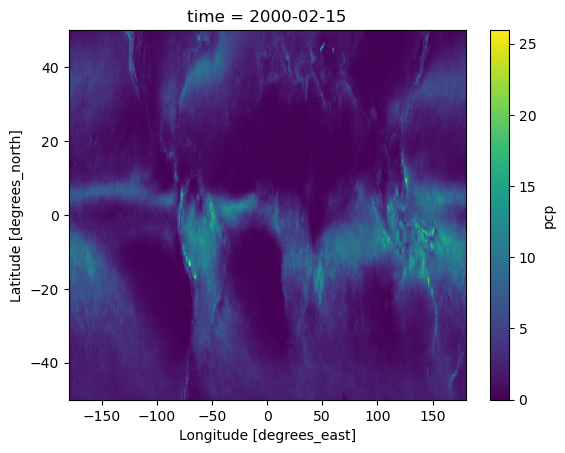

In [6]:
prcp.isel(time=0).plot()  # isel is used to specify the index.

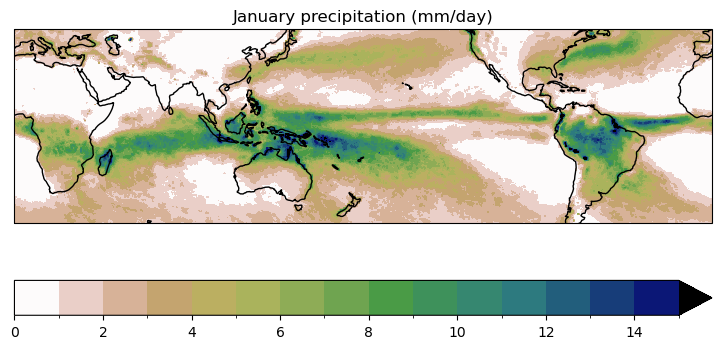

In [7]:
# Make a prettier plot
lev1=np.arange(0,16,1)
proj = ccrs.PlateCarree()
# color map
cmap1=plt.cm.gist_earth_r

fig1 = plt.figure(figsize=(9,5))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
cs=(prcp.isel(time=0)).plot.contourf(ax=ax, transform=ccrs.PlateCarree(),levels=lev1, cmap=cmap1, add_colorbar=False, add_labels=False)
ax.coastlines()
plt.title('January precipitation (mm/day)')
fig1.colorbar(cs, orientation='horizontal') # color map

#### Exercise
Plot July precipitation.

## Plotting rainfall over Africa

Text(0.5, 1.0, 'January precipitation (mm/day)')

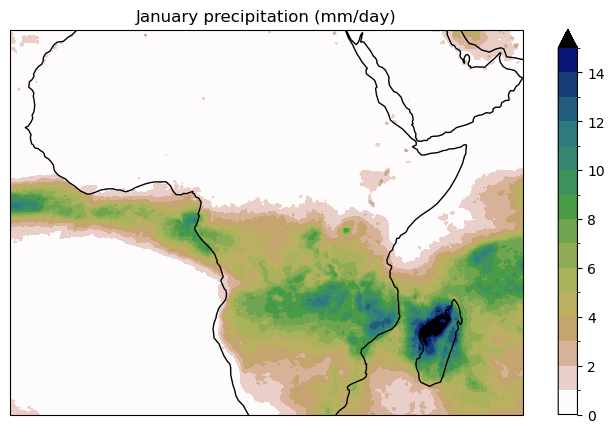

In [8]:
fig2 = plt.figure(figsize=(9,5))
ax2 = plt.axes(projection=ccrs.PlateCarree(central_longitude=10))
ax2.set_extent([-20, 60, -30, 30], ccrs.PlateCarree())
cs2=(prcp.isel(time=0)).plot.contourf(ax=ax2, transform=ccrs.PlateCarree(),levels=lev1, cmap=cmap1, add_labels=False)
ax2.coastlines()
plt.title('January precipitation (mm/day)')

#### Choose a location and plot July precpitation.
Plot July precipitation.

Text(0.5, 1.0, 'January precipitation (mm/day)')

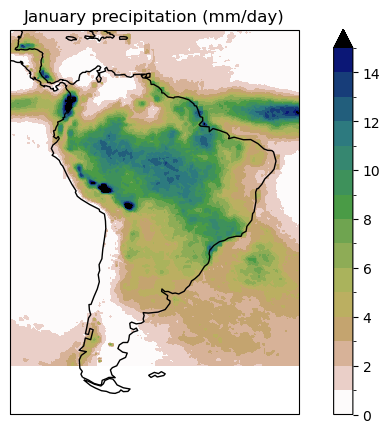

In [9]:
fig2 = plt.figure(figsize=(9,5))
ax2 = plt.axes(projection=ccrs.PlateCarree(central_longitude=10))
ax2.set_extent([-90, -30,-60,20], ccrs.PlateCarree())
cs2=(prcp.isel(time=0)).plot.contourf(ax=ax2, transform=ccrs.PlateCarree(),levels=lev1, cmap=cmap1, add_labels=False)
ax2.coastlines()
plt.title('January precipitation (mm/day)')

Text(0.5, 1.0, 'October precipitation (mm/day)')

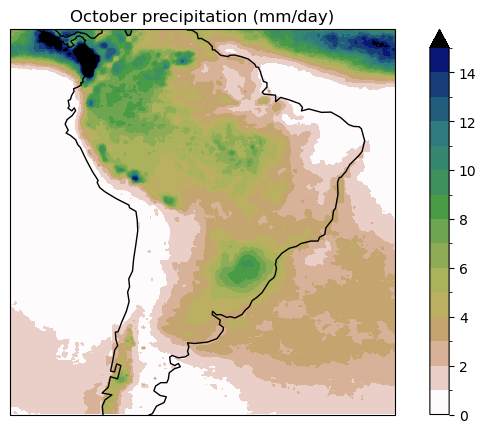

In [10]:
fig2 = plt.figure(figsize=(9,5))
ax2 = plt.axes(projection=ccrs.PlateCarree(central_longitude=10))
ax2.set_extent([-90, -30,-50,10], ccrs.PlateCarree())
cs2=(prcp.isel(time=9)).plot.contourf(ax=ax2, transform=ccrs.PlateCarree(),levels=lev1, cmap=cmap1, add_labels=False)
ax2.coastlines()
plt.title('October precipitation (mm/day)')

Text(0.5, 1.0, 'September precipitation (mm/day)')

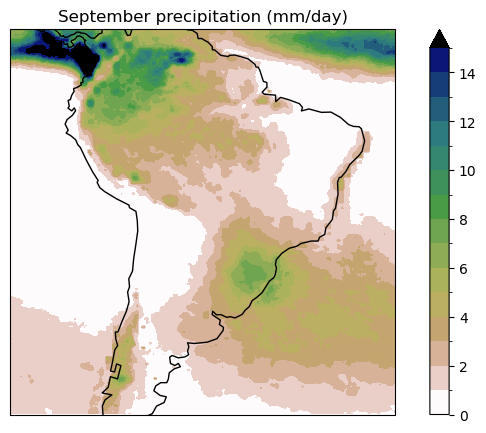

In [11]:
fig2 = plt.figure(figsize=(9,5))
ax2 = plt.axes(projection=ccrs.PlateCarree(central_longitude=10))
ax2.set_extent([-90, -30,-50,10], ccrs.PlateCarree())
cs2=(prcp.isel(time=8)).plot.contourf(ax=ax2, transform=ccrs.PlateCarree(),levels=lev1, cmap=cmap1, add_labels=False)
ax2.coastlines()
plt.title('September precipitation (mm/day)')

Text(0.5, 1.0, 'August precipitation (mm/day)')

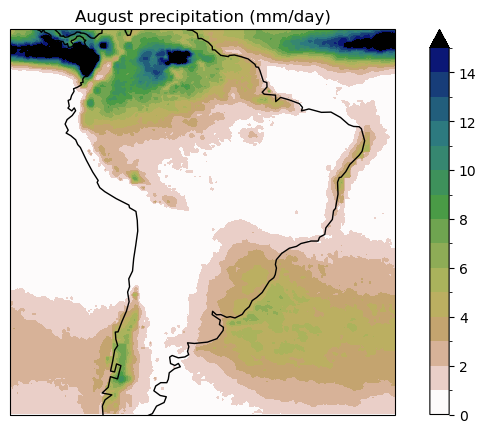

In [12]:
fig2 = plt.figure(figsize=(9,5))
ax2 = plt.axes(projection=ccrs.PlateCarree(central_longitude=10))
ax2.set_extent([-90, -30,-50,10], ccrs.PlateCarree())
cs2=(prcp.isel(time=7)).plot.contourf(ax=ax2, transform=ccrs.PlateCarree(),levels=lev1, cmap=cmap1, add_labels=False)
ax2.coastlines()
plt.title('August precipitation (mm/day)')

Text(0.5, 1.0, 'November precipitation (mm/day)')

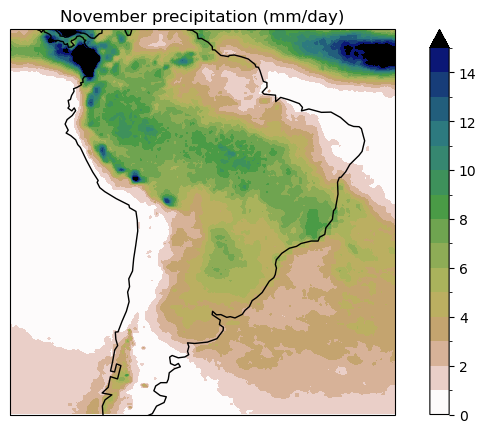

In [13]:
fig2 = plt.figure(figsize=(9,5))
ax2 = plt.axes(projection=ccrs.PlateCarree(central_longitude=10))
ax2.set_extent([-90, -30,-50,10], ccrs.PlateCarree())
cs2=(prcp.isel(time=10)).plot.contourf(ax=ax2, transform=ccrs.PlateCarree(),levels=lev1, cmap=cmap1, add_labels=False)
ax2.coastlines()
plt.title('November precipitation (mm/day)')

Text(0.5, 1.0, 'January precipitation (mm/day)')

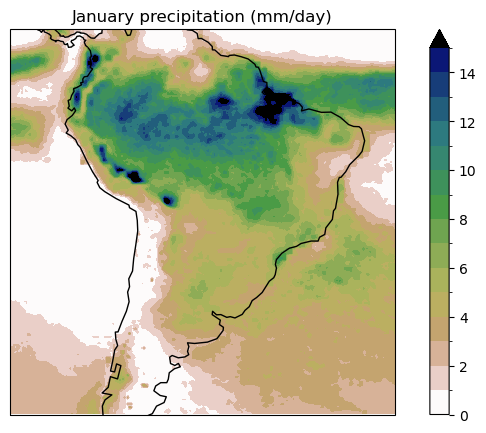

In [14]:
fig2 = plt.figure(figsize=(9,5))
ax2 = plt.axes(projection=ccrs.PlateCarree(central_longitude=10))
ax2.set_extent([-90, -30,-50,10], ccrs.PlateCarree())
cs2=(prcp.isel(time=2)).plot.contourf(ax=ax2, transform=ccrs.PlateCarree(),levels=lev1, cmap=cmap1, add_labels=False)
ax2.coastlines()
plt.title('January precipitation (mm/day)')